In [46]:
import math
import os
import numpy as np
from matplotlib import pyplot

Logistic regression is a statistical model widely used in Machine Learning to predict outcome that can be classified into well defined groups.
For instance: pass/fail, healhy/sick, win/lose etc. It can be also used to classify events - for example, determine whether the image contains specific object (i.e. dog).

Because it makes more sense to have a function (model) which values are between 0 and 1, sigmoid function is used as a basic model for prediction outcome.

\begin{align}
g(z) = \dfrac{1}{1 + e^{-z}}
\end{align}

Drawing a sigmoid function in Python is easy:

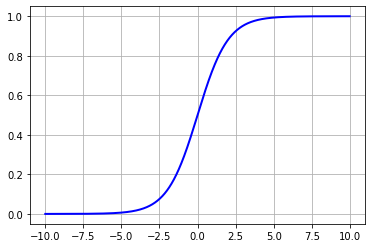

In [38]:
rand_z = np.arange(-10., 10., 0.01)
g = lambda z: 1 / (1 + math.e ** (-z))
calc_g = [g(z) for z in rand_z]

pyplot.plot(rand_z, calc_g, color='b', lw=2)
pyplot.gca().grid()

In the simplest form, everything above value 0.5 is considered to fit the model.
Let's import data from CSV file - it was provided as part of a great Andrew Ng's course on coursera. It contains three columns:
- Column 1: Result (in %) from first exam
- Column 2: Result (in %) from second exam
- Column 3: 1 (Accepted) or 0 (Rejected) - indicator whether student got admitted into Uni (based on exam results)


In [62]:
student_results = np.genfromtxt('logistic-regression/exams_results.csv', delimiter=',')
X = student_results[:, [0,1]] # <-- Dataset
y = student_results[:, [2]] # <-- Actual outcome

Plotting this dataset might be a bit trickier as we need two separate indicators - one for students that got admitted into university and the other ones that were not.